<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
%pip install spicy

Note: you may need to restart the kernel to use updated packages.


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    ResponseId                      65437 non-null  int64  
 1    MainBranch                      65437 non-null  object 
 2    Age                             65437 non-null  object 
 3    Employment                      65437 non-null  object 
 4    RemoteWork                      54806 non-null  object 
 5    Check                           65437 non-null  object 
 6    CodingActivities                54466 non-null  object 
 7    EdLevel                         60784 non-null  object 
 8    LearnCode                       60488 non-null  object 
 9    LearnCodeOnline                 49237 non-null  object 
 10   TechDoc                         40897 non-null  object 
 11   YearsCode                       59869 non-null  object 
 12   YearsCodePro    

In [4]:
df.describe(include="all")

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [ ]:
## Write your code here

In [ ]:
# Remove any rows that contain missing values
# df.dropna(inplace=True)

# Verify null removal
# print("Null values per column:\n", df.isnull().sum())

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
print(df["Employment"].value_counts(dropna=False))
print(df["JobSat"].value_counts(dropna=False))
print(df["YearsCodePro"].value_counts(dropna=False))

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


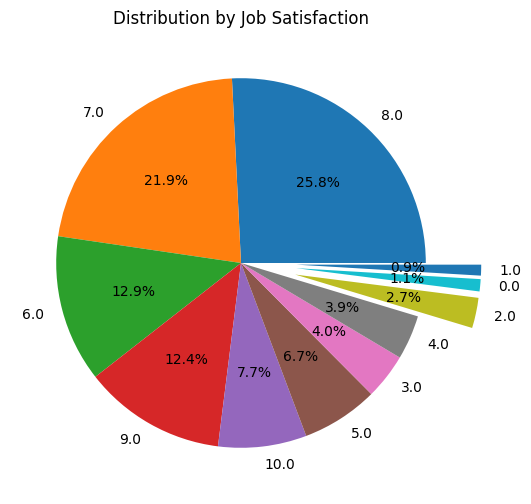

In [6]:
counts = df['JobSat'].value_counts()

explode = [0] * len(counts)

for i, label in enumerate(counts.index):
    if label in [0.0, 1.0, 2.0]:
        explode[i] = 0.3

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', explode=explode)
plt.title('Distribution by Job Satisfaction')
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


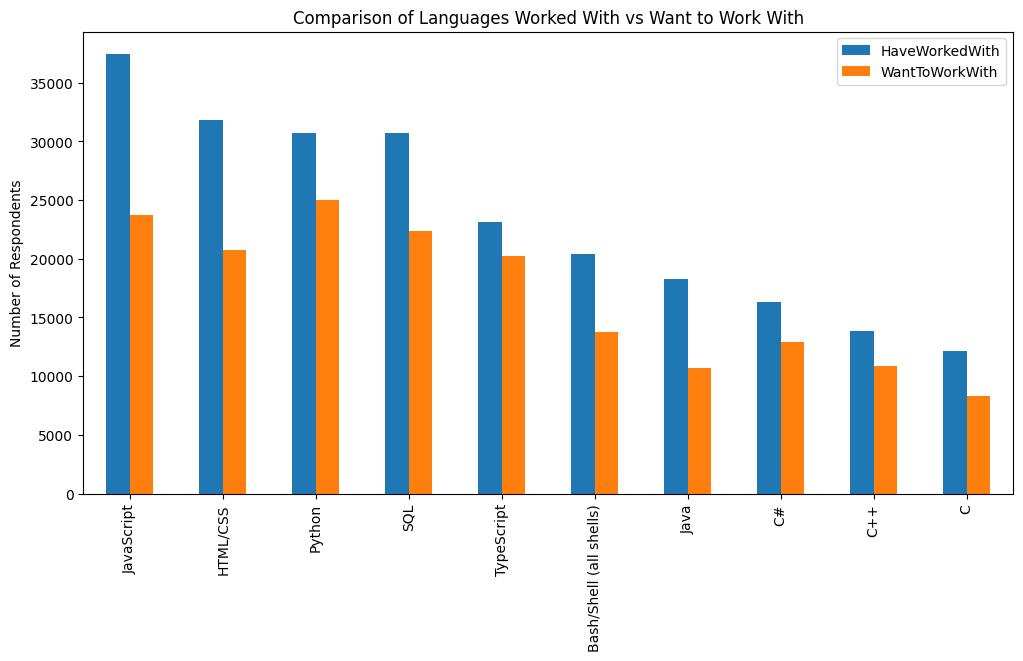

In [7]:
langs_worked = df['LanguageHaveWorkedWith'].str.split(';').explode()
counts_worked = langs_worked.value_counts(dropna=False)

langs_want = df['LanguageWantToWorkWith'].str.split(';').explode()
counts_want = langs_want.value_counts(dropna=False)

df_langs = pd.DataFrame({
    'HaveWorkedWith': counts_worked,
    'WantToWorkWith': counts_want
}).fillna(0)
data = df_langs.sort_values(by="HaveWorkedWith", ascending=False).head(10)

data.plot(kind='bar', figsize=(12,6))
plt.title('Comparison of Languages Worked With vs Want to Work With')
plt.ylabel('Number of Respondents')
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


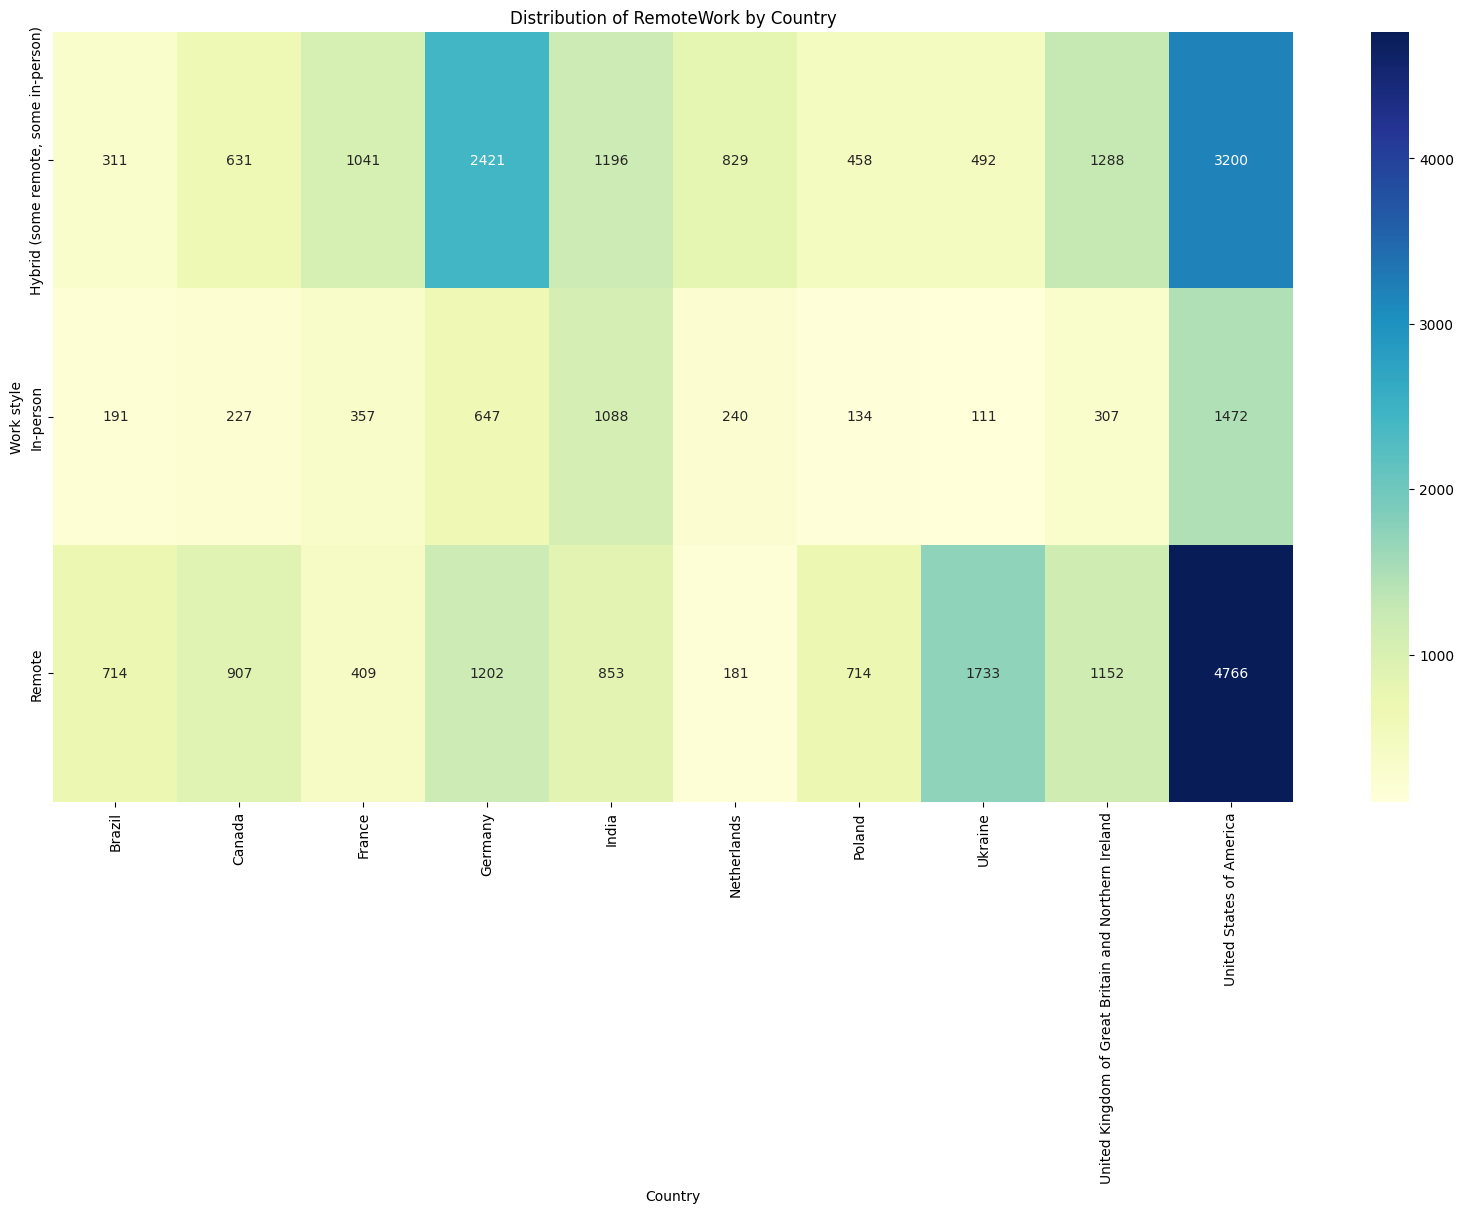

In [8]:
ct = pd.crosstab(df["RemoteWork"], df["Country"])
top_country = df["Country"].value_counts().nlargest(10).index
ct = ct.loc[:, ct.columns.intersection(top_country)]

plt.figure(figsize=(20,10))
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Distribution of RemoteWork by Country")
plt.xlabel("Country")
plt.ylabel("Work style")
plt.show()

In [ ]:
# Example: Top 10 countries by respondent count
# country_counts = df['Country'].value_counts().head(10)

# plt.figure(figsize=(10,6))
# sns.barplot(x=country_counts.values, y=country_counts.index)
# plt.title('Top 10 Countries by Respondents')
# plt.xlabel('Count')
# plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [9]:
# Create a freely manipulable copy of the dataframe
df_cleaned = df.copy()
# Create a numeric column and convert to numbers all values from `YearsCodePro`, while also managing specific values.
df_cleaned["YearsCodePro_num"] = df_cleaned["YearsCodePro"].replace({
    "Less than 1 year": "0.5",
    "More than 50 years": "51"
}).astype(float)
# Drop rows with NaN values on `JobSat` and `YearsCodePro`
df_cleaned = df_cleaned[['JobSat', "YearsCodePro_num"]].dropna()

In [12]:

correlation_pearson = df_cleaned['JobSat'].corr(df_cleaned["YearsCodePro_num"])
print(f"Pearson correlation coefficient : {correlation_pearson:.2f}")
correlation_spearman = df_cleaned['JobSat'].corr(df_cleaned["YearsCodePro_num"], method='spearman')
print(f"Spearman correlation coefficient : {correlation_spearman:.2f}")

Pearson correlation coefficient : 0.10
Spearman correlation coefficient : 0.12


In [11]:
# Pearson
corr_pearson, p_value_pearson = stats.pearsonr(df_cleaned['JobSat'].dropna(), df_cleaned["YearsCodePro_num"].dropna())
print(f"Pearson corr: {corr_pearson:.2f}, p-value: {p_value_pearson:.4f}")

# Spearman
corr_spearman, p_value_spearman = stats.spearmanr(df_cleaned['JobSat'].dropna(), df_cleaned["YearsCodePro_num"].dropna())
print(f"Spearman corr: {corr_spearman:.2f}, p-value: {p_value_spearman:.4f}")

Pearson corr: 0.10, p-value: 0.0000
Spearman corr: 0.12, p-value: 0.0000


In [ ]:
# Example: Correlation between Age and Salary
# Convert to numeric in case data has strings
# df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# corr, p_value = stats.pearsonr(df['Age'].dropna(), df['Salary'].dropna())
# print(f"Pearson Correlation between Age and Salary: {corr:.2f}, p-value: {p_value:.4f}")

# # Correlation heatmap (optional)
# plt.figure(figsize=(8,6))
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [28]:
df_cleaned = df.copy()
df_cleaned.loc[:, "Employment"] = df_cleaned['Employment'].str.split(';').str[0].str.strip()
df_cleaned.loc[:, "EdLevel"] = df_cleaned["EdLevel"].fillna("Unknown")
df_cleaned["EdLevel_short"] = df_cleaned["EdLevel"].replace({
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor’s degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master’s degree",
    "Some college/university study without earning a degree": "College/University (No degree)",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional degree",
    "Associate degree (A.A., A.S., etc.)": "Associate degree",
    "Primary/elementary school": "Elementary school",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school"
})
cross_count = pd.crosstab(df_cleaned["Employment"], df_cleaned["EdLevel_short"])
cross_proportion = pd.crosstab(df_cleaned["Employment"], df_cleaned["EdLevel_short"], normalize="index")
# cross_count.head(cross_count.shape[0])
cross_proportion.head(cross_proportion.shape[0])

EdLevel_short,Associate degree,Bachelor’s degree,College/University (No degree),Elementary school,Master’s degree,Professional degree,Secondary school,Something else,Unknown
Employment,,,,,,,,,
"Employed, full-time",0.027900,0.423719,0.099508,0.004451,0.276538,0.051193,0.041185,0.009920,0.065586
"Employed, part-time",0.030612,0.315542,0.112245,0.020408,0.253532,0.066719,0.087912,0.019623,0.093407
I prefer not to say,0.016484,0.175824,0.093407,0.093407,0.097070,0.053114,0.168498,0.152015,0.150183
"Independent contractor, freelancer, or self-employed",0.029781,0.324901,0.153391,0.013814,0.269645,0.051310,0.078938,0.014711,0.063509
"Not employed, and not looking for work",0.014184,0.219858,0.139007,0.127660,0.102128,0.024113,0.236879,0.045390,0.090780
"Not employed, but looking for work",0.032895,0.402961,0.148026,0.022697,0.164145,0.026974,0.092763,0.020724,0.088816
Retired,0.034286,0.300952,0.146667,0.011429,0.222857,0.182857,0.034286,0.020952,0.045714
"Student, full-time",0.020516,0.221046,0.172601,0.075976,0.051357,0.007015,0.341760,0.020649,0.089080
"Student, part-time",0.034091,0.273674,0.169508,0.049242,0.107008,0.009470,0.227273,0.030303,0.099432


<Figure size 800x600 with 0 Axes>

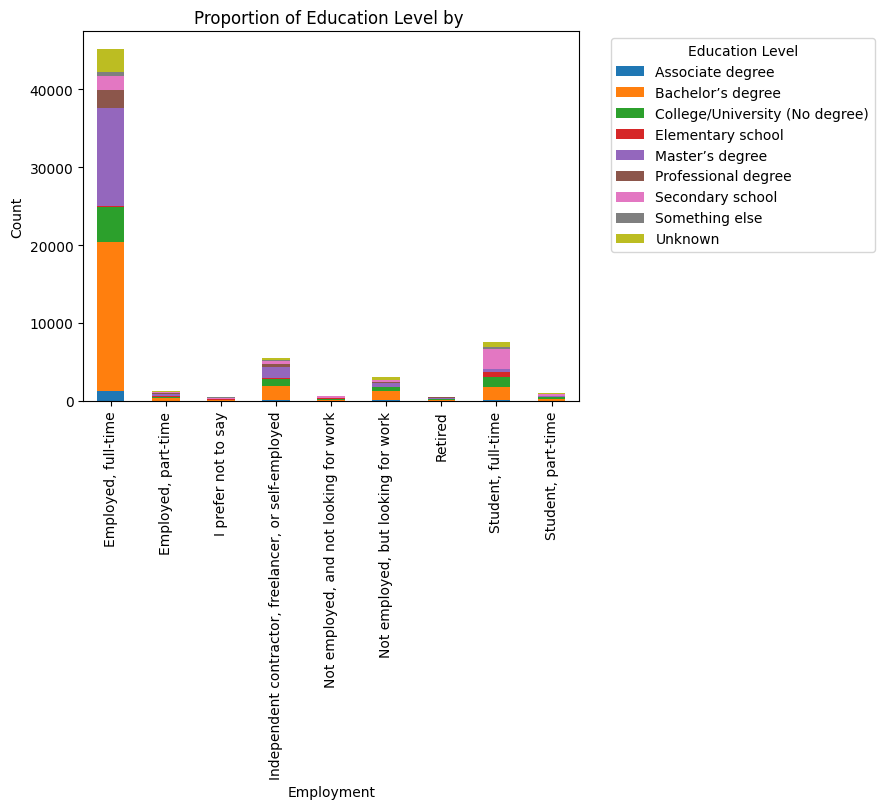

In [30]:
plt.figure(figsize=(8,6))
cross_count.plot(kind="bar", stacked=True)
plt.title("Proportion of Education Level by ")
plt.xlabel("Employment")
plt.ylabel("Count")
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Figure size 800x600 with 0 Axes>

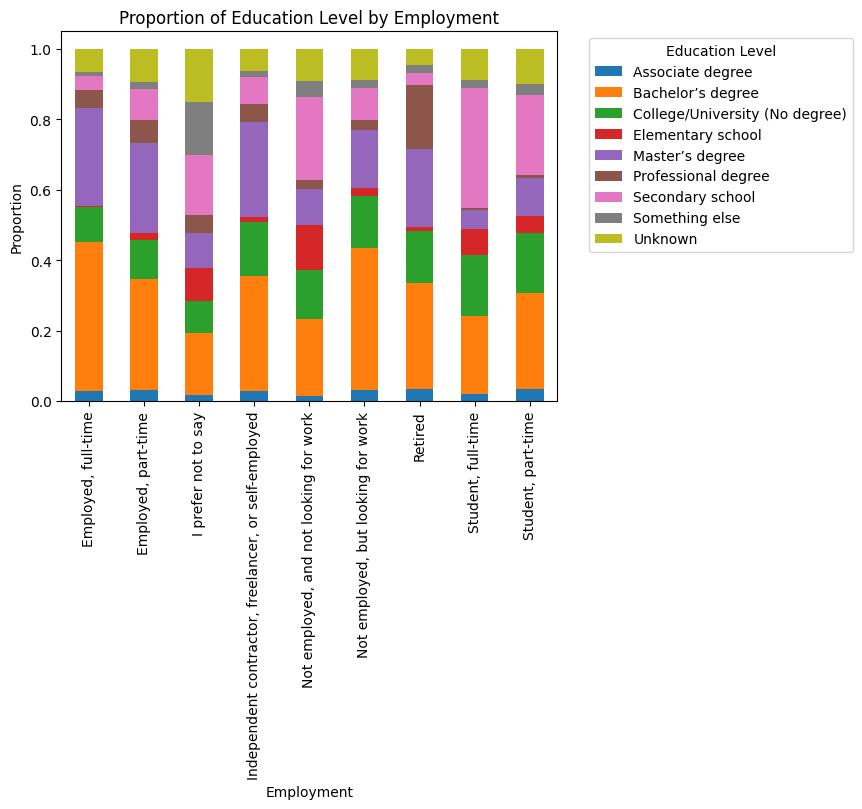

In [29]:
plt.figure(figsize=(8,6))
cross_proportion.plot(kind="bar", stacked=True)
plt.title("Proportion of Education Level by Employment")
plt.xlabel("Employment")
plt.ylabel("Proportion")
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# Example 1: Gender vs Employment Type
# cross1 = pd.crosstab(df['Employment'], df['EdLevel'])
# print(cross1)

# plt.figure(figsize=(8,6))
# sns.heatmap(cross1, annot=True, fmt='d', cmap='Blues')
# plt.title('Cross Tabulation: Gender vs Employment Type')
# plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
# df_cleaned.to_csv("survey-data_cleaned.csv", index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
